<a href="https://colab.research.google.com/github/rafavidal1709/projeto_aplicado_iv/blob/main/Carcara_targz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install rasterio
!pip install https://carcara.asav.com.br/package/Carcara.tar.gz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 42.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for Carcara: filename=Carcara-1.0.0-py3-none-any.whl size=8926 sha256=632bf70646868d1111ce06ba5172d67d869272aa91ff6f3b31e6b765ca3f557c
  Stored in directory: /tmp/pip-ephem-wheel-cache-psnpcnm8/wheels/e3/73/c7/23a622037655643b17127b88e71beab039e973748d53b15922
Successfully built Carcara


In [19]:
from Carcara import Carcara

carcara = Carcara()
all_files = carcara.api.listFiles()

all_files[:10]

['2018_12_13.tif',
 '2018_12_13_scl.tif',
 '2018_12_18.tif',
 '2018_12_18_scl.tif',
 '2018_12_23.tif',
 '2018_12_23_scl.tif',
 '2018_12_28.tif',
 '2018_12_28_scl.tif',
 '2019_01_02.tif',
 '2019_01_02_scl.tif']

Arquivo salvo em: 2025_02_24.tif
Arquivo salvo em: 2025_02_24_scl.tif


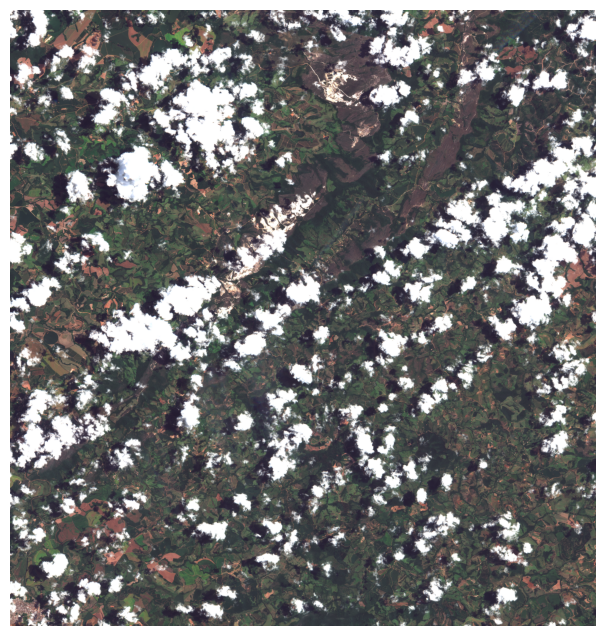

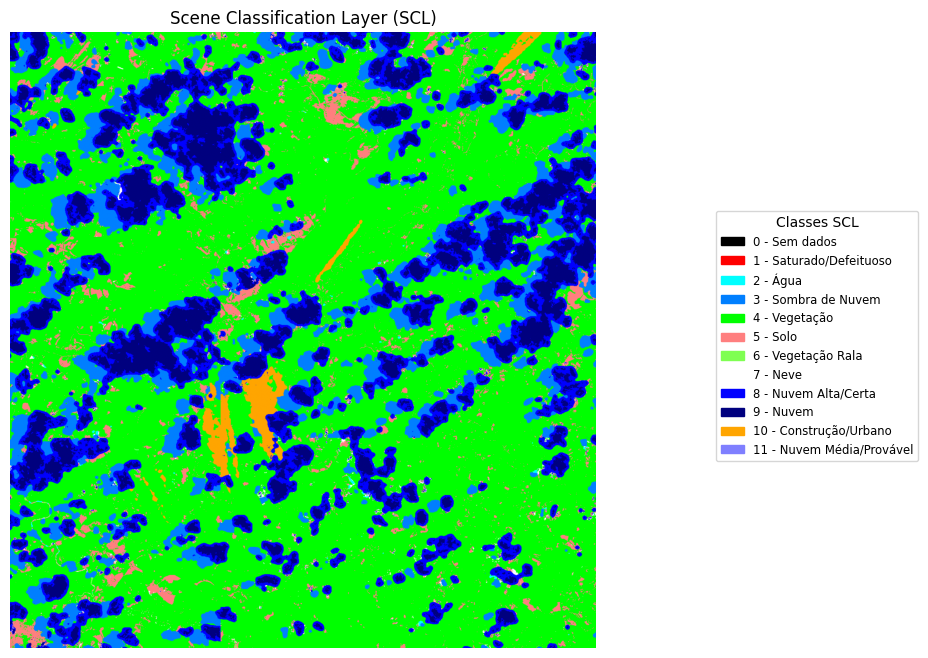

In [3]:
date = "2025_02_24"

carcara.api.downloadFile( date + ".tif" )
carcara.api.downloadFile( date + "_scl.tif" )

carcara.dataset.show(date)
carcara.dataset.showSCL(date)

print("")

In [4]:
X = carcara.dataset.open_tif(date)
print(X.shape)
mask = carcara.dataset.open_tif(date+'_scl')
print(mask.shape)

(12, 3137, 2983)
(1, 3137, 2983)


In [20]:
import re

padrao = re.compile(r'(\d{4}_\d{2}_\d{2})(?:_scl)?\.tif', re.IGNORECASE)

bases = []
scl = []
for nome in all_files:
    match = padrao.match(nome)
    if match:
        data = match.group(1)
        if '_scl' in nome.lower():
            scl.append(data)
        else:
            bases.append(data)

print("Bases:", len(bases))
print("SCL:", len(scl))

Bases: 455
SCL: 453


In [21]:
print("Base sem o SCL:")
for nome in bases:
    if nome not in scl:
        print("- ", nome)

print("\nSCL sem a base:")
for nome in scl:
    if nome not in bases:
        print("- ", nome)

Base sem o SCL:
-  2020_06_05
-  2021_11_17

SCL sem a base:


In [24]:
from datetime import datetime, timedelta
datas = []
for nome in bases:
    datas.append(datetime.strptime(nome, "%Y_%m_%d"))

print("Menor data: ", min(datas))
print("Maior data: ", max(datas))
print("\nFaltou:")

data = min(datas)
while(data < max(datas)):
    if not data in datas:
        print(data.strftime("%Y_%m_%d"))
    data += timedelta(days=5)

Menor data:  2018-12-13 00:00:00
Maior data:  2025-03-01 00:00:00

Faltou:
